# Predict Graduate Admissions
Probelm Statement: This dataset is created for prediction of Graduate Admissions from an 
Indian perspective.
**Content** : The dataset contains several parameters which are considered important during the 
application for Masters Programs. The parameters included are:
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 ) is the Target Variable
## Classification Models


1. Logistic Regression
2. Decision Trees and Random Forest
3. Support Vector Machines
## Regression Models


1. Linear Regression 
2. Lasso, Ridge, ElasticNet Regression
3. Support Vector Regression
4. Polynomial Regression
5. Decision tree regression
6. Random forest regression
### STEPS


1. Import required libraries
2. Read data
3. Data cleaning and Basic Operations
4. Statistical Analysis
5. Univariate Analysis
6. Graphical Analysis: Outliers, Histplot, Countplot etc.
7. Bivariate Analysis
8. Segregate dependent and independet features
9. Train Test Split : VIF Check, Multicollinearity
10. Scaling: Standard Scaler/ Minmax Scaler
11. Model Creation: Train Accuracy
12. Store Model using Pickle then Pickle Verification
13. Test Data prediction through MSE, MAE, RMSE, R-squared, Adjusted R-squared
14. Next Model and its Training and Testing alongwith prediction metrics
15. Comparison Table of all Model

**Load the Data and Analysis of Variables**

Import required libraries



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
     

Read data

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
col_names=df.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample Data:")
print(df.head())

Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


 Data cleaning and Basic Operations
 

1. As we said there were Space in Chance of Admit Variable
2. Serial No has Full stop Sign name it as no
3. Change the other variable into lowercase for easy to use

**Rename columns to make their use easier.**

In [3]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

**The type of columns can be found as follows:**

In [4]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

**Check shape of the data and whether there exist missing values:**

In [5]:
print('Shape of the data:')
df.shape

Shape of the data:


(500, 9)

In [6]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


no          0
gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

**Fortunately, data has no missing values**

The "chance" column is the outcome variable and takes value between 0 and 1. 1 represents that the subject is admitted to the program while 0 represents rejected applications. Problem can be classified as a binary classification problem where outcome probability refers to the probability of subject being admitted to the program. Since only chance of admission is provided, the analysis will continue as a prediction analysis of chance of admission.

**Data Exploration**

First of all, let us see the basic statistics of the data.

In [7]:
df.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

- The mean, or average.
- 50% aka Median it is very import to understand Skeweness of the Data
- The standard deviation, or how spread out the data is.
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.


Second, let us analyze the distribution of subjects' chance of admit in the data. Let us see how rating affects chance of admission:

In [8]:
df.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [9]:
df[df['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


### Several observations:
- Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.
- Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.
- Research Shows us 75% Research Experience so there may be chances to Reject the Application in the next we take more than 83%

In [10]:
df

,no,gre,toefl,rating,sop,lor,gpa,research,chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


Graphical Analysis: Outliers, Histplot, Countplot etc.

### Data Visualization
#### Histogram of Admission Chance
Let us visualize our data to get a much clearer picture of the data and the significant features.

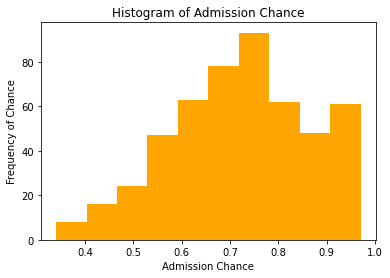

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

Histogram shows us that 'chance of admission' column is well distributed in data.

##### Line Plot for Research Output and The Chance of Admission

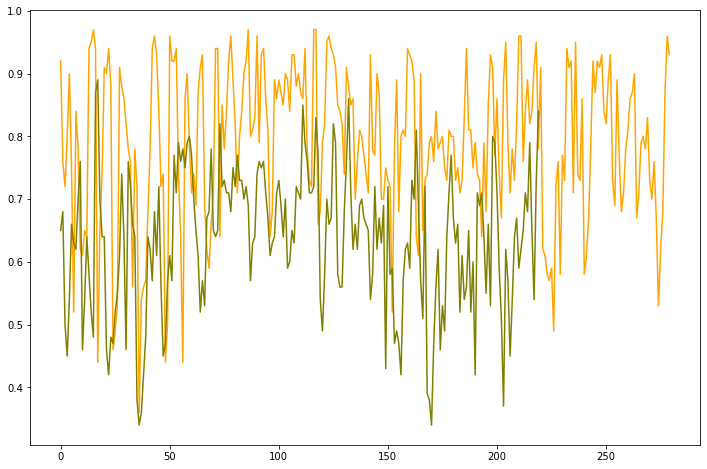

In [12]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['chance'], color='orange')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['chance'], color='olive')
plt.show()

The chance of admission depends a great deal on the subjects' research output; hence, research can be a good predictor in predicting the outcome.

#### Scatter Plot of University Rating and The Chance of Admission

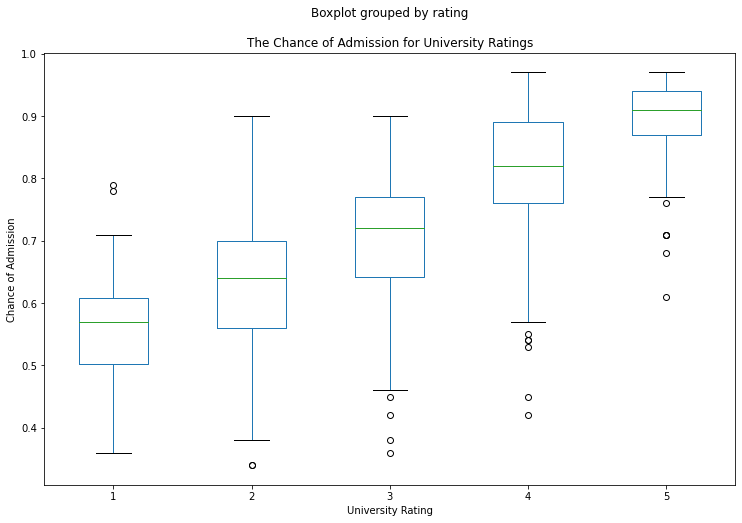

In [13]:
df.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

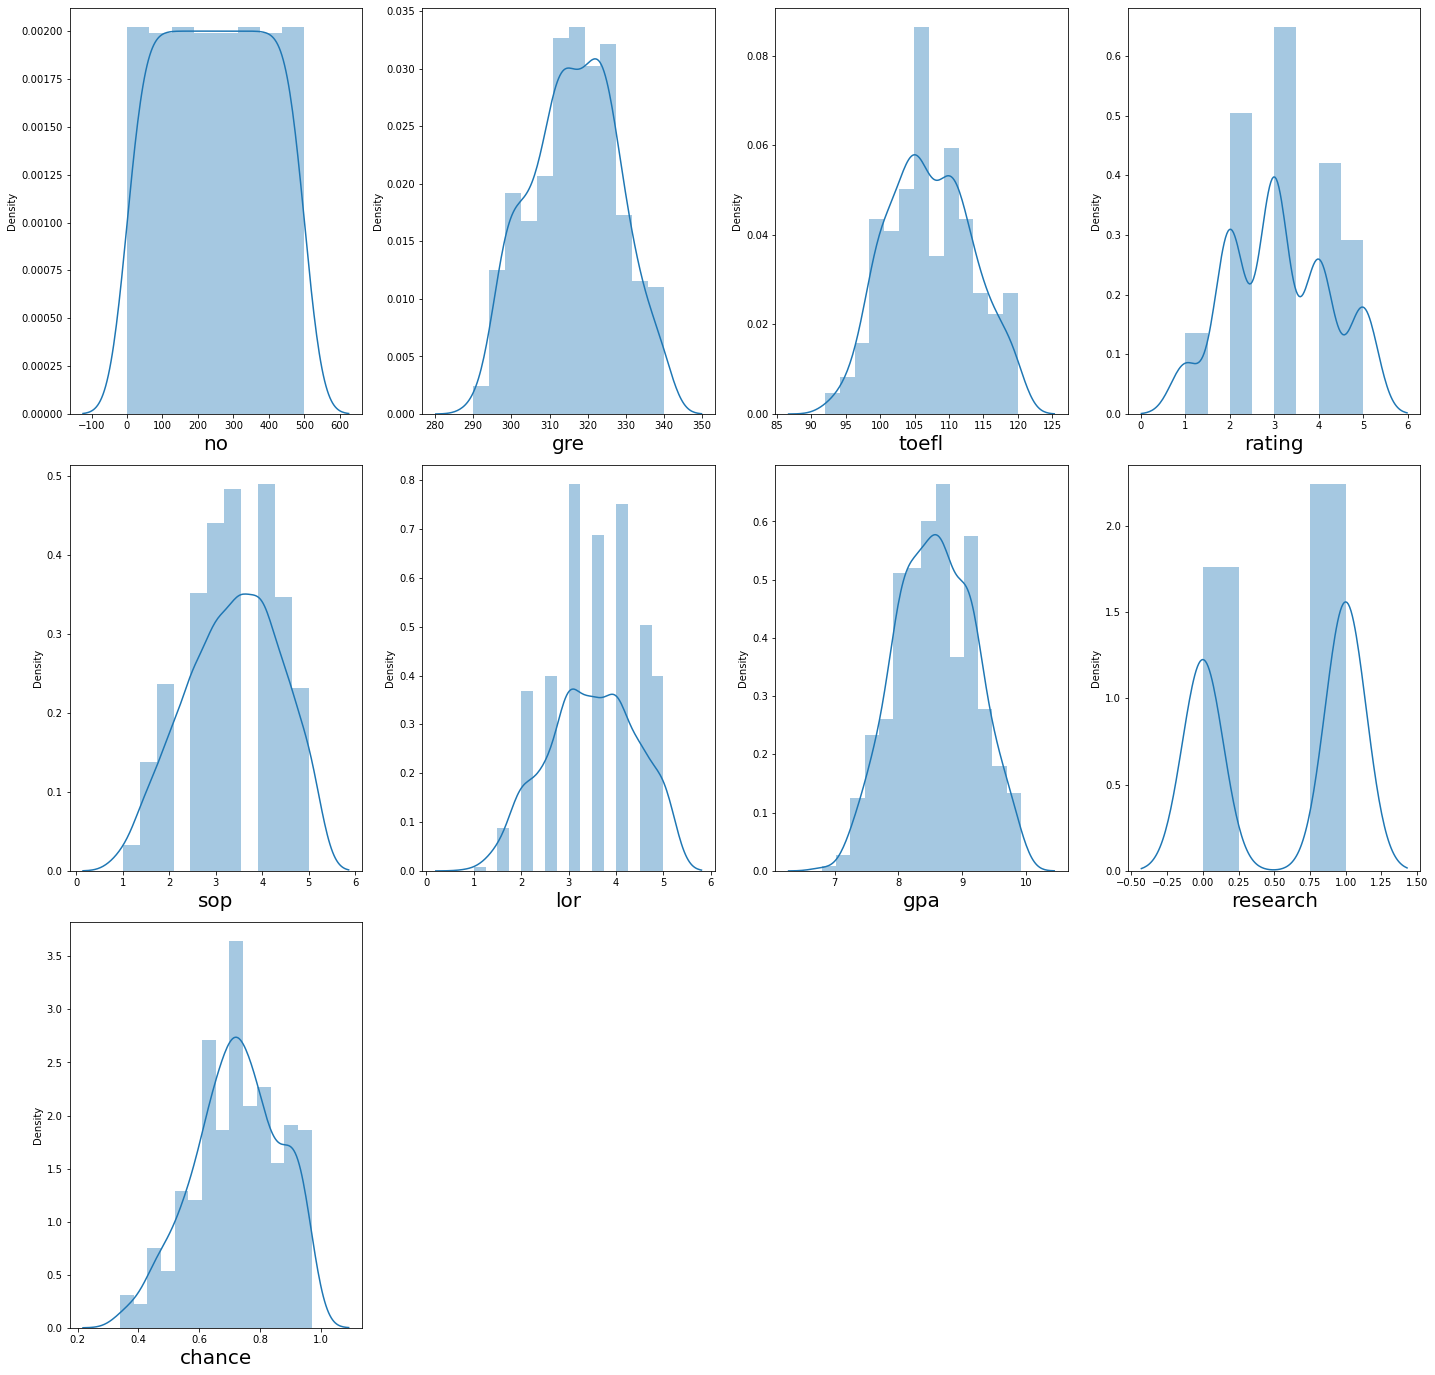

In [14]:
# data distribution on every column in the dataset
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Histogram of Numeric Variables

### Data Preperation
As it can be seen from Data Preprocessing section above, graduate admission data is only include numerical variables. Hence, only the following steps should be implemented before model devolopment:

- The outcome variable is 'chance', and all other features are predictors.
- 'no' variable should be dropped from dataset since it only indicator of the instances (means ID Column)

In [15]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [16]:
df.shape

(500, 9)

In [17]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.

In [18]:
# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

Data normalization is important in order to represent data in comparable scales.

In [19]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

**MIN - MAX Scaler** its Better use always the Scaler methods to improve the Accuracy

#### Classification Models & Furher Analysis
In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 83% chance. Third quartile, 83%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [20]:
X = df.drop(["chance"],axis=1)
y = df["chance"].values

In [21]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train,y_train_01)

LogisticRegression()

In [23]:
y_predlogr = logr.predict(x_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))

Accuracy Score: 0.93


In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

[[68  2]
 [ 5 25]]


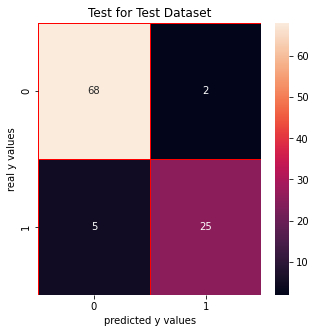

In [26]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.9259259259259259
recall_score:  0.8333333333333334
f1_score:  0.8771929824561403


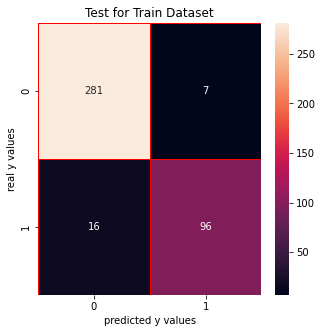

In [28]:
cm_lrc_train = confusion_matrix(y_train_01,logr.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_01)
y_pred_dtc = dtc.predict(x_test)
print("score: ", dtc.score(x_test,y_test_01))


score:  0.93


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc

array([[67,  3],
       [ 4, 26]], dtype=int64)

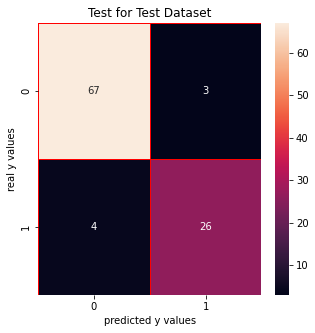

In [31]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [32]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_dtc))
print("recall_score: ", recall_score(y_test_01, y_pred_dtc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_dtc))

precision_score:  0.896551724137931
recall_score:  0.8666666666666667
f1_score:  0.8813559322033899


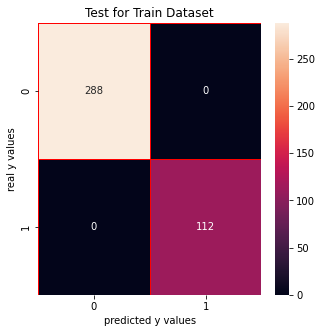

In [33]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

### Support Vector Machine

In [34]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train_01)
y_pred_svm = svm.predict(x_test)
print("score: ", svm.score(x_test,y_test_01))

score:  0.93


In [35]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[68,  2],
       [ 5, 25]], dtype=int64)

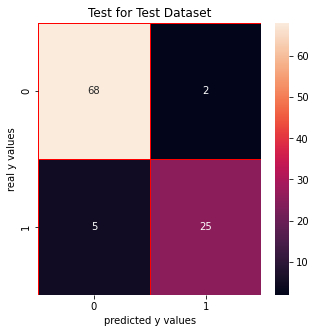

In [36]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_svm))
print("recall_score: ", recall_score(y_test_01,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_svm))

precision_score:  0.9259259259259259
recall_score:  0.8333333333333334
f1_score:  0.8771929824561403


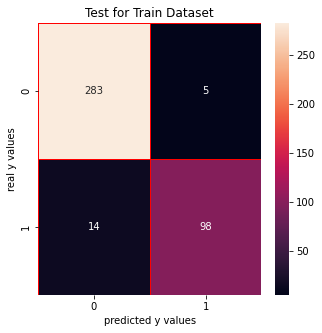

In [38]:
cm_svm_train = confusion_matrix(y_train_01, svm.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

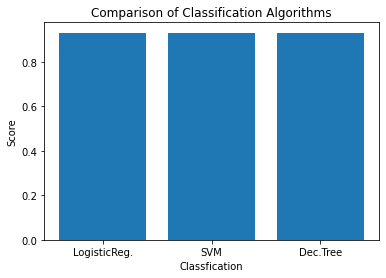

In [39]:
y = np.array([logr.score(x_test, y_test_01), svm.score(x_test, y_test_01), dtc.score(x_test,y_test_01) ])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
x = ["LogisticReg.", "SVM", "Dec.Tree"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()

### Prediction Models : Regression Algorithm (Supervised Machine Learning)¶

In [40]:
X = df.drop(['chance'], axis=1)
y = df['chance']

In [41]:
X

,gre,toefl,rating,sop,lor,gpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [42]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['gpa','gre', 'toefl']] = scaler.fit_transform(X[['gpa','gre', 'toefl']])

In [43]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Linear Regression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.8126327365181196 
Linear Regression MSE: 0.0035190869745734404, 
Linear Regression RMSE:0.05932189287753249


In [48]:
X_selected = X[['gpa', 'gre', 'toefl']]
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_selected, y, random_state=101)

In [49]:
lr_sel = LinearRegression()
lr_sel.fit(X_sel_train, y_train)
lr_sel_predictions = lr_sel.predict(X_sel_test)

In [50]:
lr_sel_r2 = r2_score(y_test, lr_sel_predictions)
lr_sel_mse = mean_squared_error(y_test, lr_sel_predictions)
lr_sel_rmse = np.sqrt(lr_sel_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_sel_r2, lr_sel_mse, lr_sel_rmse))

Linear Regression R2 Score: 0.7891805958364757 
Linear Regression MSE: 0.0039595594523423126, 
Linear Regression RMSE:0.06292503041192998


### Random forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(X_train,y_train)
y_head_rfr = rfr.predict(X_test) 

In [52]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_rfr))

r_square score:  0.7812698788611929


### Decision tree regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test) 

In [54]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))

r_square score:  0.6175012352409999


#### Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [55]:
#importing regularization models from sklearn library

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [56]:

lassocv = LassoCV(alphas=None,cv=10,max_iter=2000000,normalize=True)
lassocv.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=2000000, normalize=True)

In [57]:
#alpha value - (lambda value in the equation)

lassocv.alpha_

1.1365103998498048e-05

In [58]:
#lasso

lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=1.1365103998498048e-05)

In [59]:
#model accuracy

lasso.score(X_test,y_test)

0.8126311635664673

In [60]:
#RidgeCV model building with 10cv

ridgecv = RidgeCV(alphas=(0.1,1.0,10.0),cv = 10,normalize=True)


In [61]:
ridgecv.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

RidgeCV(cv=10, normalize=True)

In [62]:
#alpha value

ridgecv.alpha_

0.1

In [63]:
#rebuilding the model to change the alpha value

ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10,normalize=True)
ridgecv.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

RidgeCV(alphas=array([6.92758648, 5.51415116, 5.29946948, 5.09303958, 4.09308633,
       4.95084866, 5.90415766, 1.89703474, 4.21823106, 8.28180584,
       6.44523125, 0.55416264, 7.46931612, 3.98556645, 5.84034276,
       2.9845733 , 5.92472918, 1.7805224 , 8.69245498, 1.5416294 ,
       8.19868536, 6.43415012, 1.06655976, 3.67598953, 8.16826832,
       3.17540525, 7.0911514 , 7.74742437, 6.79576401, 2.90058026,
       2.69544076, 9.70138031, 5.85811633, 7.74106888, 0.84476406,
       8.04609171, 8.20620283, 8.25722638, 5.13848293, 7.06465312,
       7.76245646, 4.55863204, 5.82887605, 4.11567316, 8.51512463,
       1.15347892, 0.2483429 , 1.7209681 , 6.23028572, 1.2240657 ]),
        cv=10, normalize=True)

In [64]:
#better alpha value

ridgecv.alpha_

0.2483429048920094

In [65]:
#ridge

ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train,y_train)

Ridge(alpha=0.2483429048920094)

In [66]:
#model accuracy

ridge.score(X_test,y_test)

0.8126354402208257

In [67]:
#elastic model building with same 10 cv

elasticcv = ElasticNetCV(alphas=None,cv=10)
elasticcv.fit(X_train,y_train)

ElasticNetCV(cv=10)

In [68]:
#alpha value

elasticcv.alpha_

0.0007700056633025155

In [69]:
#l1 ratio - lambda value

elasticcv.l1_ratio_

0.5

In [70]:
#elastic model building

elastic = ElasticNet(alpha=elasticcv.alpha_,l1_ratio=elasticcv.l1_ratio_)


In [71]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0007700056633025155)

In [72]:
#model accuracy

elastic.score(X_test,y_test)

0.8125335075435001

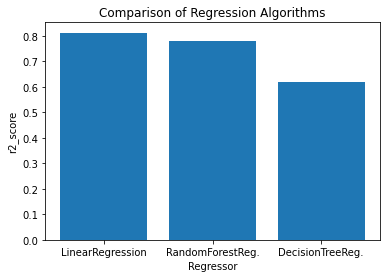

In [73]:
y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()